[[0.   1.19 1.   1.   1.19 1.19 1.19 1.   1.19 1.19 1.19 1.  ]
 [1.19 0.   0.   0.   1.19 1.19 1.19 0.   1.19 1.19 1.19 0.  ]
 [1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
case = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 12.329999999999998
case = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 8.329999999999998
case = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost 

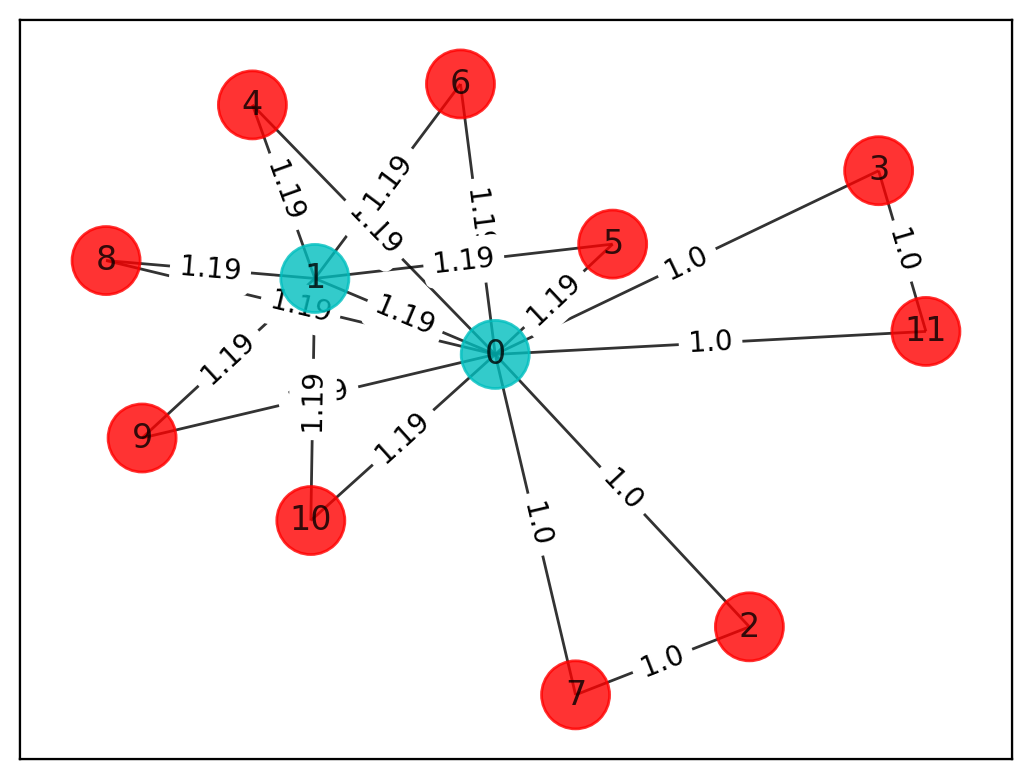

In [30]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Generating a graph of 5 nodes

n=12 # Number of nodes in graph
G=nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist=[ 

    (0,1,1.19), 

    (0,2,1.0), 

    (0,3,1.0), 

    (0,4,1.19), 

    (0,5,1.19), 

    (0,6,1.19), 

    (0,7,1.0), 

    (0,8,1.19), 

    (0,9,1.19), 

    (0,10,1.19), 

    (0,11,1.0), 

    (1,0,1.19), 

    (1,4,1.19), 

    (1,5,1.19), 

    (1,6,1.19), 

    (1,8,1.19), 

    (1,9,1.19), 

    (1,10,1.19), 

    (2,0,1.0), 

    (2,7,1.0), 

    (3,0,1.0), 

    (3,11,1.0), 

    (4,0,1.19), 

    (4,1,1.19), 

    (5,0,1.19), 

    (5,1,1.19), 

    (6,0,1.19), 

    (6,1,1.19), 

    (7,0,1.0), 

    (7,2,1.0), 

    (8,0,1.19), 

    (8,1,1.19), 

    (9,0,1.19), 

    (9,1,1.19), 

    (10,0,1.19), 

    (10,1,1.19), 

    (11,0,1.0), 

    (11,3,1.0)]

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

draw_graph(G, colors, pos)

# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight']
print(w)

best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)
print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))

In [ ]:
## Variation Quantum Eigensolver

#Source: https://qiskit.org/documentation/optimization/tutorials/06_examples_max_cut_and_tsp.html

# Some helpful documentation link:
  * https://qiskit.org/documentation/stubs/qiskit.algorithms.VQE.html#qiskit.algorithms.VQE

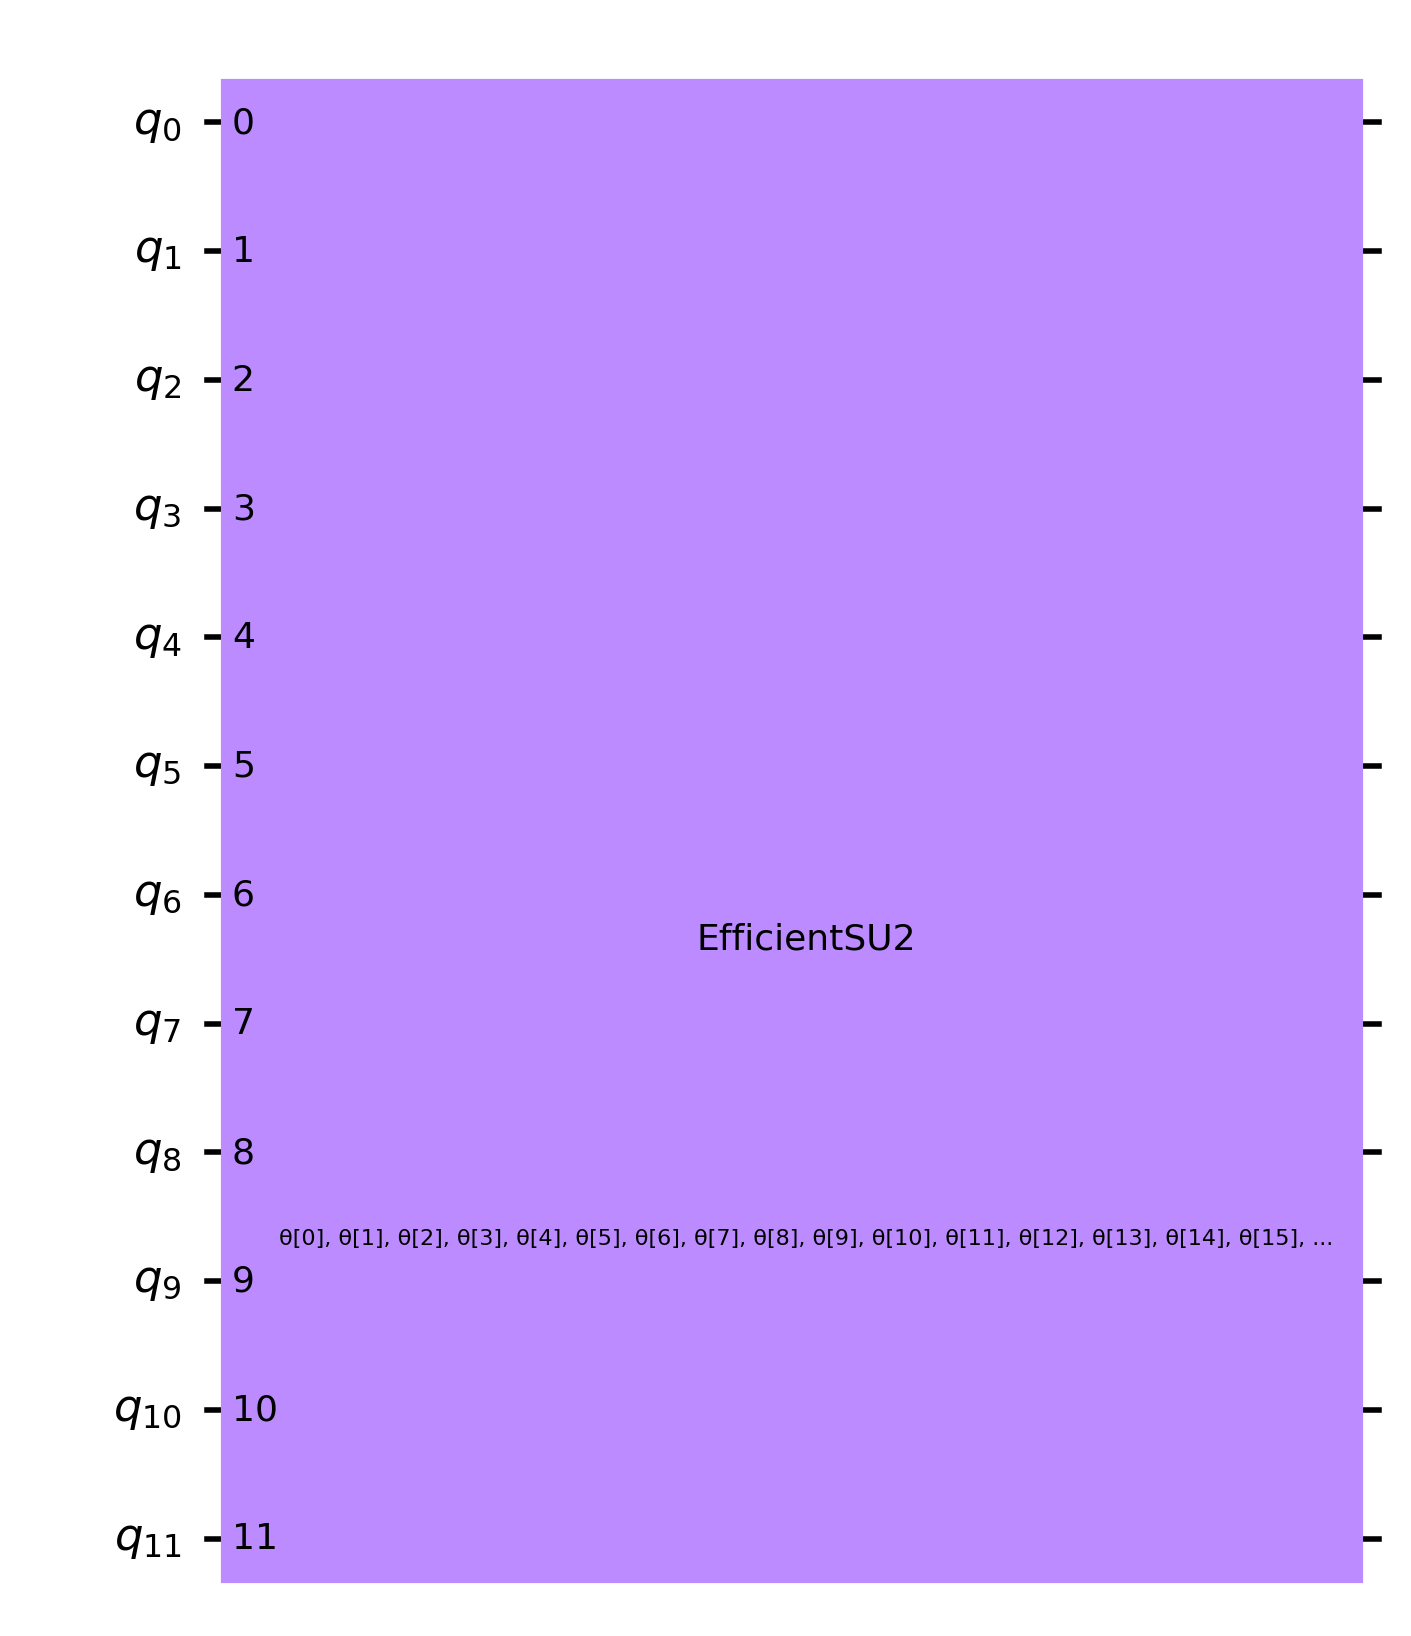

In [31]:
# General imports
import time
import numpy as np

# VQE Imports
from qiskit.algorithms.minimum_eigensolvers import VQE  # new import!!!
from qiskit.algorithms.optimizers import SPSA
from qiskit.primitives import Estimator
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver


# SciPy minimizer routine
from scipy.optimize import minimize

# Pre-defined ansatz circuit and operator class for Hamiltonian
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp

# The IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options
service = QiskitRuntimeService()

# Desired instance goes here, for running jobs on the quantum machine, use "ibm_guadalupe"
backend = "ibmq_qasm_simulator"

# SciPy minimizer routine
from qiskit.algorithms.optimizers import SPSA

# Plotting functions
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
from qiskit_optimization.applications import Maxcut, Tsp # DEPRECATED


# Define our Qiskit Maxcut Instance
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()

# Translate to Ising Hamiltonian
qubitOp, offset = qp.to_ising()

# Construct VQE
# opt = SPSA(maxiter=300)
# ansatz = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')

# estimator = Estimator(options={"shots": 2048})
# seed = 10598



ansatz = EfficientSU2(qubitOp.num_qubits)
ansatz.draw("mpl")

In [32]:
def cost_func(params, ansatz, qubitOp, estimator):
    """ Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        qubitOp (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate """

    energy = (
        estimator.run(ansatz, qubitOp,
                      parameter_values=params).result().values[0]
    )
    return energy

In [33]:
num_params = ansatz.num_parameters
num_params

96

In [34]:
x0 = 2 * np.pi * np.random.random(num_params)

In [35]:
def build_callback(ansatz, qubitOp, estimator, callback_dict):
    """Return callback function that uses Estimator instance,
    and stores intermediate values into a dictionary.

    Parameters:
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        qubitOp (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance
        callback_dict (dict): Mutable dict for storing values

    Returns:
        Callable: Callback function object
    """

    def callback(current_vector):
        """Callback function storing previous solution vector,
        computing the intermediate cost value, and displaying number
        of completed iterations and average time per iteration.

        Values are stored in pre-defined 'callback_dict' dictionary.

        Parameters:
            current_vector (ndarray): Current vector of parameters
                                      returned by optimizer
        """
        # Keep track of the number of iterations
        callback_dict["iters"] += 1
        # Set the prev_vector to the latest one
        callback_dict["prev_vector"] = current_vector
        # Compute the value of the cost function at the current vector
        callback_dict["cost_history"].append(
            estimator.run(ansatz, qubitOp, parameter_values=current_vector)
            .result()
            .values[0]
        )
        # Grab the current time
        current_time = time.perf_counter()
        # Find the total time of the execute (after the 1st iteration)
        if callback_dict["iters"] > 1:
            callback_dict["_total_time"] += current_time - \
                callback_dict["_prev_time"]
        # Set the previous time to the current time
        callback_dict["_prev_time"] = current_time
        # Compute the average time per iteration and round it
        time_str = (
            round(callback_dict["_total_time"] /
                  (callback_dict["iters"] - 1), 2)
            if callback_dict["_total_time"]
            else "-"
        )
        # Print to screen on single line
        print(
            "Iters. done: {} [Avg. time per iter: {}]".format(
                callback_dict["iters"], time_str
            ),
            end="\r",
            flush=True,
        )

    return callback




In [36]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
    "_total_time": 0,
    "_prev_time": None,
}


In [37]:
while iter<17:
    with Session(backend=backend):
        estimator = Estimator(options={"shots": 2048})
        callback = build_callback(ansatz, qubitOp, estimator, callback_dict)
        res = minimize(
            cost_func,
            x0,
            args=(ansatz, qubitOp, estimator),   
            method="cobyla",
            callback=callback,
        )    
        # print(vqe.eigenvalue)
        # res = vqe.result()
        print(f"job id: {res.job_id()}")
        result = res.compute_minimum_eigenvalue(qubitOp)
        print(result)
        
        y = max_cut.sample_most_likely(result['eigvecs'][0])
        print('energy:', result['energy'])
        print('time:', result['eval_time'])
        print('partition objective:', result['energy'] + offset)
        print('solution:', y)
        print('solution objective:', qp.objective.evaluate(x))
        
        result

        
    Session.close()

# print results
x = max_cut.sample_most_likely(result.eigenstate)
print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
print('max-cut objective:', result.eigenvalue.real + offset)
print('solution:', x)
print('solution objective:', qp.objective.evaluate(x))


numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=PauliSumOp(H2_op))
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

# plot results
colors = ['r' if x[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)

KeyboardInterrupt: 

## VQE Circuit

In [45]:
# from ibm_quantum_widgets import CircuitComposer
from qiskit import *
from qiskit.circuit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit


optimal_qc = res.get_optimal_circuit()
editor = CircuitComposer(circuit=optimal_qc)

NameError: name 'res' is not defined

In [ ]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

# Attention:
# ----------
# Custom gates are not supported yet in version v2.0.18
# Find following an equivalent qasm based circuit:
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate woLocal(param0, param1, param2, param3, param4, param5, param6, param7, param8, param9, param10, param11, param12, param13, param14, param15, param16, param17, param18, param19, param20, param21, param22, param23, param24, param25, param26, param27, param28, param29) q0, q1, q2, q3, q4 {
  ry(4.17547467622234) q0;
  ry(-6.28821176436223) q1;
  ry(-1.40486327346273) q2;
  ry(-1.65761619691524) q3;
  ry(-6.14158138762570) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(5.73372000866355) q0;
  ry(4.44984240828826) q1;
  ry(-2.16630455123368) q2;
  ry(5.25310273616428) q3;
  ry(6.60377416164812) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-3.02596698749212) q0;
  ry(-5.23189687300101) q1;
  ry(4.40282278376381) q2;
  ry(-1.59837998872848) q3;
  ry(4.87056597878950) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(0.292183299692795) q0;
  ry(4.66344709704271) q1;
  ry(-2.75794041871292) q2;
  ry(6.36851929306560) q3;
  ry(1.97367616622618) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-2.59972754332686) q0;
  ry(-6.34598189366981) q1;
  ry(-1.63846773063449) q2;
  ry(-0.414504994387513) q3;
  ry(-5.76970867997880) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-7.15380384732267) q0;
  ry(-0.901232949916589) q1;
  ry(-0.606527349276767) q2;
  ry(3.11855267646828) q3;
  ry(-1.11874403569820) q4;
}

qreg q[5];

woLocal(4.17547467622234,-6.28821176436223,-1.40486327346273,-1.65761619691524,-6.14158138762570,5.73372000866355,4.44984240828826,-2.16630455123368,5.25310273616428,6.60377416164812,-3.02596698749212,-5.23189687300101,4.40282278376381,-1.59837998872848,4.87056597878950,0.292183299692795,4.66344709704271,-2.75794041871292,6.36851929306560,1.97367616622618,-2.59972754332686,-6.34598189366981,-1.63846773063449,-0.414504994387513,-5.76970867997880,-7.15380384732267,-0.901232949916589,-0.606527349276767,3.11855267646828,-1.11874403569820) q[0],q[1],q[2],q[3],q[4];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)

### EigenOptimizer Check

In [41]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer

# create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(res)

# solve quadratic program
result3 = vqe_optimizer.solve(qp)
print(result3.prettyprint())

colors = ['r' if result3.x[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)

NameError: name 'res' is not defined

In [ ]:
# Runs as of 6/21/22
# Ask Alex about EigenOptimizer Check if necessary
# VQE cell can call stuff from brute force cell (eg. w weight matrix)